# 1. Obtain Pokemon images

## 1.1 Obtain the images from Kaggle

In [1]:
!kaggle datasets download -d thedagger/pokemon-generation-one -p data/images

Dataset URL: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
License(s): GPL-2.0
... resuming from 1138753536 bytes (1173217984 bytes left) ...
100%|█████████████████████████████████████▉| 2.15G/2.15G [02:23<00:00, 9.05MB/s]
100%|██████████████████████████████████████| 2.15G/2.15G [02:23<00:00, 8.19MB/s]


In [2]:
!unzip data/images/pokemon-generation-one.zip -d data/images

Archive:  data/images/pokemon-generation-one.zip
  inflating: data/images/dataset/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg  
  inflating: data/images/dataset/Abra/05e7ae416d91489dbf71fbe333aff4b8.jpg  
  inflating: data/images/dataset/Abra/06b9eec4827d4d49b1b4c284308708df.jpg  
  inflating: data/images/dataset/Abra/10a9f06ec6524c66b779ea80354f8519.jpg  
  inflating: data/images/dataset/Abra/1788abb8b51f48509cfac8067bd99e14.jpg  
  inflating: data/images/dataset/Abra/28cfad92ad934d1f9b579cbff4b5d012.jpg  
  inflating: data/images/dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg  
  inflating: data/images/dataset/Abra/2fd28e699b7c4208acd1637fbad5df2d.jpeg  
  inflating: data/images/dataset/Abra/32240b108a8140f8b31c495166fc453c.jpg  
  inflating: data/images/dataset/Abra/34532bb006714727ade4075f0a72b92d.jpg  
  inflating: data/images/dataset/Abra/3680c3f65a484c3ba05a7cb93e1d7ae3.jpg  
  inflating: data/images/dataset/Abra/3c4ab4f4e1d548e5bc038715b47b4d51.jpg  
  inflating: data/images/d

## 1.2 Show some images with its label

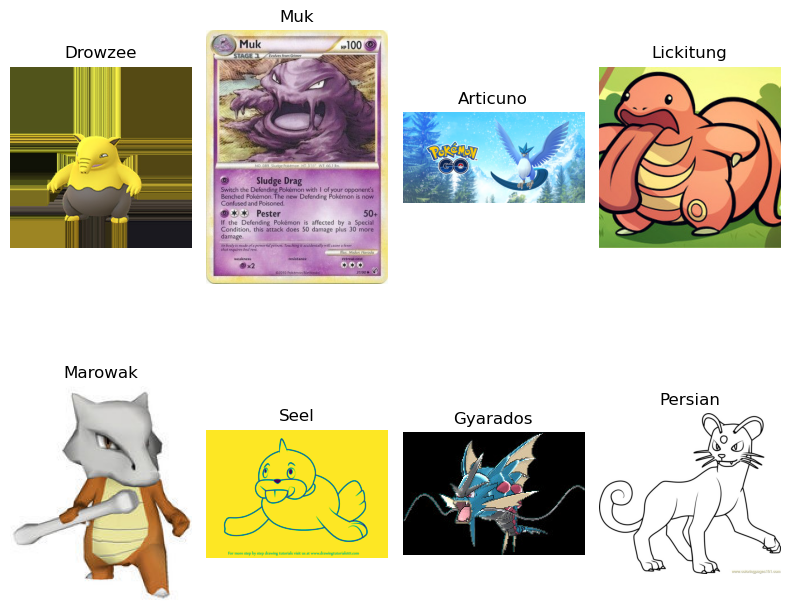

In [23]:
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = 'data/images/dataset'

pokemon_folders = [f for f in os.listdir(image_folder)]

fig, ax = plt.subplots(2, 4, figsize=(8, 8))
ax = ax.flatten()

for i in range(8):
    random_pokemon = random.choice(pokemon_folders)
    pokemon_images = os.listdir(os.path.join(image_folder, random_pokemon))
    random_image = random.choice(pokemon_images)
    image_path = os.path.join(image_folder, random_pokemon, random_image)
    
    img = mpimg.imread(image_path)
    ax[i].imshow(img)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off') 

plt.tight_layout()
plt.show()


## 1.3 See the class distribution

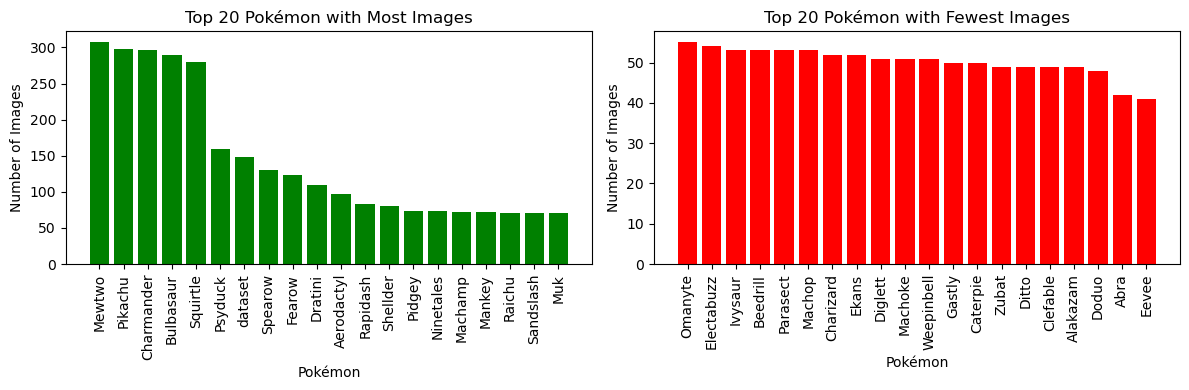

In [26]:
image_counts = {}
for folder in pokemon_folders:
    folder_path = os.path.join(image_folder, folder) # Obtiene la ruta 
    image_files = [f for f in os.listdir(folder_path)]
    image_counts[folder] = len(image_files)

image_counts = dict(sorted(image_counts.items(), key=lambda item: item[1], reverse=True))

top_20_pokemon = list(image_counts.keys())[:20]
top_20_counts = list(image_counts.values())[:20]

bottom_20_pokemon = list(image_counts.keys())[-20:]
bottom_20_counts = list(image_counts.values())[-20:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 

ax1.bar(top_20_pokemon, top_20_counts, color='green')
ax1.set_title('Top 20 Pokémon with Most Images')
ax1.set_xlabel('Pokémon')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=90) 

ax2.bar(bottom_20_pokemon, bottom_20_counts, color='red')
ax2.set_title('Top 20 Pokémon with Fewest Images')
ax2.set_xlabel('Pokémon')
ax2.set_ylabel('Number of Images')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()